In [125]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
from PIL import Image
import numpy as np

## Utilities

In [55]:
def display_images_row(images):
    images = map(mpimg.imread, image_files)
    plt.figure(figsize=(20,10))
    columns = len(image_files)
    for i, image in enumerate(images):
        plt.subplot(1, columns, i + 1)
        plt.imshow(image)
        plt.axis('off')

# Data Analysis

## Good cars

First, 8144 images of normal cars were downloaded from http://ai.stanford.edu/~jkrause/cars/car_dataset.html as cars_train.tgz.

In [39]:
good_cars_path = "C:\\Users\\Sasha\\Desktop\\broken cars\\datasets\\good_cars"

good_cars = os.listdir(good_cars_path)

len(good_cars)

8144

Let's look at some examples.

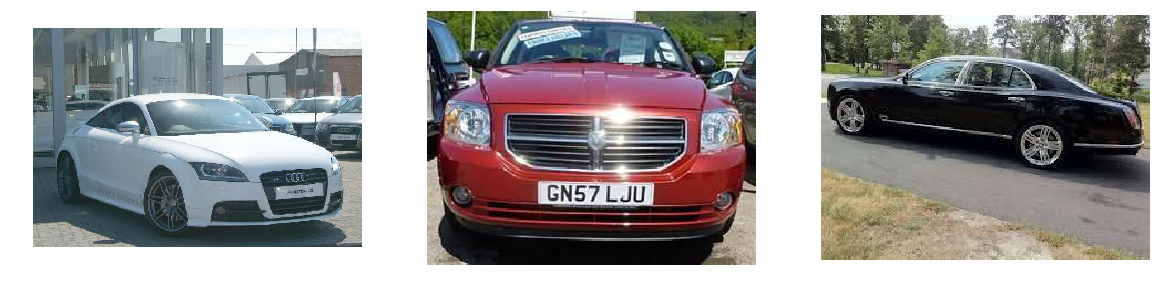

In [56]:
image_files = [os.path.join(good_cars_path, 'good_0001.jpg'), 
               os.path.join(good_cars_path, 'good_0500.jpg'),
               os.path.join(good_cars_path, 'good_6233.jpg')]
display_images_row(images)

Some images in this dataset have white background instead of the natural environment around the car. But this won't be the case for images of damaged cars.

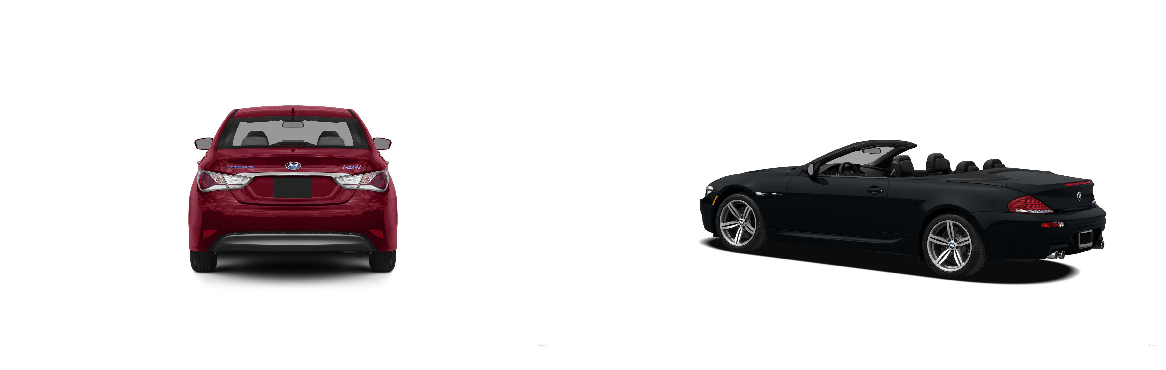

In [57]:
image_files = [os.path.join(good_cars_path, 'good_0004.jpg'), 
               os.path.join(good_cars_path, 'good_0022.jpg')]
display_images_row(images)

Let's filter out these images not to bias the model to classify images with white background as "good".

In [72]:
for file in good_cars:
    filepath = os.path.join(good_cars_path, file)
    t = False
    with Image.open(filepath) as img:
        if np.average(img.getpixel((0,0))) > 245 and np.average(img.getpixel((img.size[0] - 1, img.size[1] - 1))) > 245:
            t = True
    if t:
        os.remove(filepath)

good_cars = os.listdir(good_cars_path)

len(good_cars)

7480

So, after this step we are left with 7840 images of "good" cars.

Let's analyse the distribution of image sizes in the dataset.

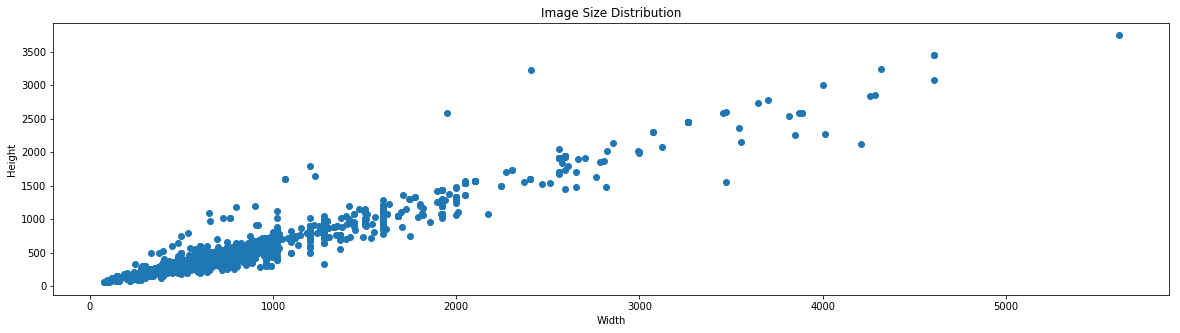

In [112]:
width = []
height = []
for file in good_cars:
    filepath = os.path.join(good_cars_path, file)
    with Image.open(filepath) as img:
        width.append(img.size[0])
        height.append(img.size[1])

plt.figure(figsize=(20,5))
plt.scatter(width, height)
plt.title('Image Size Distribution')
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

## Damaged cars

Images of damaged cars were scraped using a different script (folder "Scraper") from the website https://www.copart.com/ from the lots in the section "Non-repairable". The section was chosen because the cars in it have the most obvious visible structural damage, which can be picked out by a model. For each lot the first photo from the set of available photos was downloaded.

In [122]:
damaged_cars_path = "C:\\Users\\Sasha\\Desktop\\broken cars\\datasets\\damaged_cars"

damaged_cars = os.listdir(damaged_cars_path)

len(damaged_cars)

4148

Some examples are below.

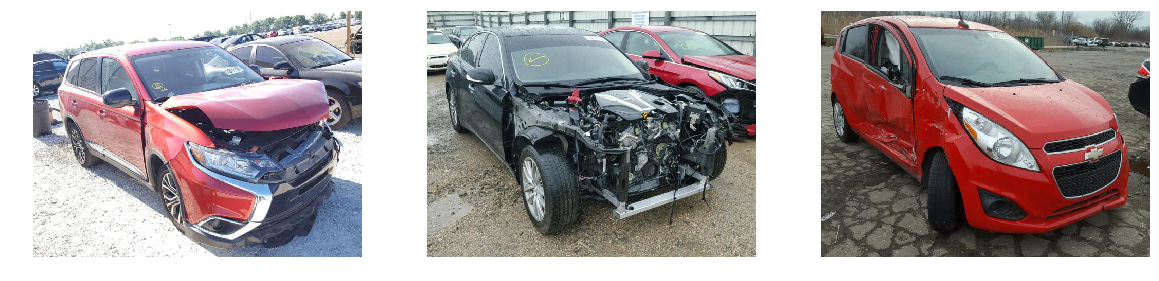

In [101]:
image_files = [os.path.join(damaged_cars_path, 'damaged_0084.jpg'), 
               os.path.join(damaged_cars_path, 'damaged_0426.jpg'),
               os.path.join(damaged_cars_path, 'damaged_4358.jpg')]
display_images_row(images)

It must be noted that because for each damaged car on the website only one photo has been taken, sometimes it doesn't show the damaged side. Several such cars are shown below. If such an image can't be classified as "damaged" from looking at it, it will be pointless to expect a model to know better. Accordingly, many (but not all) such images have been filtered out manually.

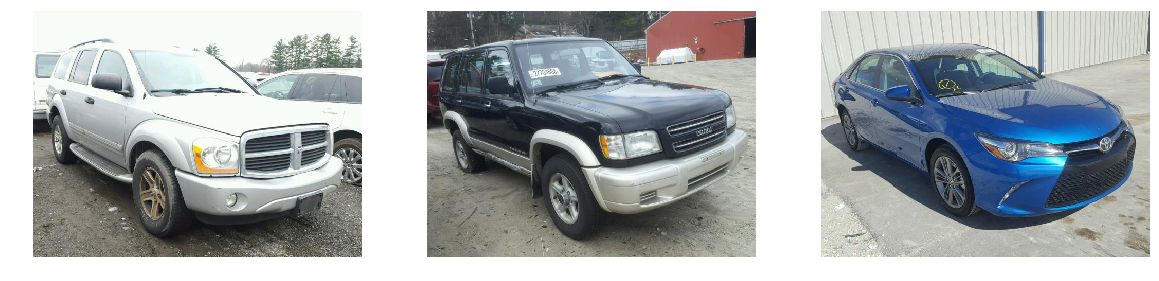

In [76]:
image_files = [os.path.join(damaged_cars_path, 'damaged_0042.jpg'), 
               os.path.join(damaged_cars_path, 'damaged_0045.jpg'),
               os.path.join(damaged_cars_path, 'damaged_0053.jpg')]
display_images_row(images)

To reduce the effect of having damaged cars photographed mostly from one angle, it makes sense to flip some random images horizontally.

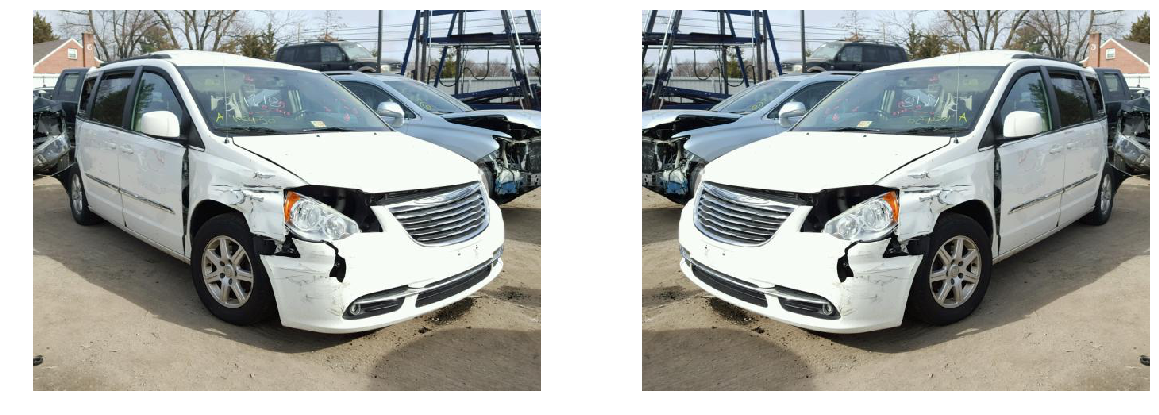

In [88]:
im = mpimg.imread(os.path.join(damaged_cars_path, 'damaged_0073.jpg'))
flipped_im = np.fliplr(im)
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(flipped_im)
plt.axis('off');

In [104]:
flipped = 0
for file in damaged_cars:
    filepath = os.path.join(damaged_cars_path, file)
    prob = np.random.rand()
    if prob > 0.5:
        with Image.open(filepath) as img:
            img = img.transpose(Image.FLIP_LEFT_RIGHT)
            img.save(filepath)
            flipped += 1
print(flipped)

2035


Let's analyse the distribution of image sizes in the dataset.

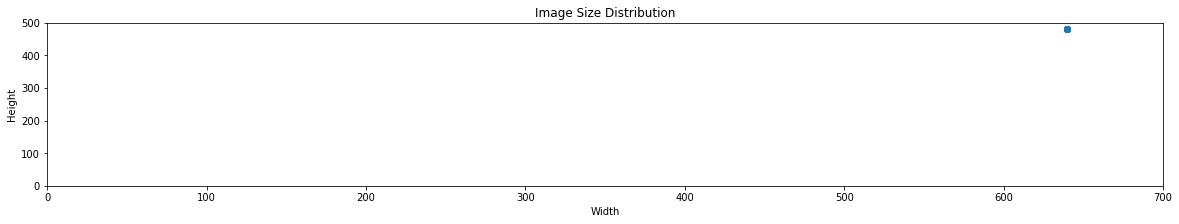

In [124]:
width = []
height = []
for file in damaged_cars:
    filepath = os.path.join(damaged_cars_path, file)
    with Image.open(filepath) as img:
        width.append(img.size[0])
        height.append(img.size[1])
plt.figure(figsize=(20,3))
plt.scatter(width, height)
plt.title('Image Size Distribution')
plt.xlabel("Width")
plt.ylabel("Height")
plt.xlim((0, 700))
plt.ylim((0,500))
plt.show()

Every image of a damaged car is equally sized 640X480.

## Final dataset 

To make to classes more homogenous in image size let's filter out images of "good" cars that are too large or too small (arbitrary bounding values around 640X480). Images will be resized before being fed into the CNN anyway.

In [149]:
for file in good_cars:
    filepath = os.path.join(good_cars_path, file)
    t = False
    with Image.open(filepath) as img:
        if not(img.size[0] > 400 and img.size[0] < 1050 and img.size[1] > 350 and img.size[1] < 800):
            t = True
    if t:
        os.remove(filepath)

good_cars = os.listdir(good_cars_path)

len(good_cars)

3995

So, we are left with 3995 images of "good" cars and images of 4148 "damaged" cars, the classes are relatively balanced in size. The ratio is:

In [150]:
print(float(len(good_cars))/len(damaged_cars))

0.9631147540983607
